# Comparing SGD to GD
We'll do some simple comparisons between SGD and GD. We will consider mostly convex problems, like classification and regression.
Remember, that what we would like to minimize is a finite sum of losses
$$\min_{\bf x} \frac{1}{n} \sum_{i=1}^n f_i({\bf x}) $$
The algorithmic iteration of SGD is
$${\bf x}_{k+1} = {\bf x}_k -\gamma_{SGD}\cdot \nabla f_{s_k} ({\bf x}_k)$$
That of Gradient Descent (GD) is given by
$${\bf x}_{k+1} = {\bf x}_k -\gamma_{GD}\cdot \frac{1}{n} \sum_{i=1}^n \nabla f_i({\bf x})$$

In [56]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import random

# SGD function
# -------------------------------------------------------
#
# X - train dataset matrix
# y - train label vector
# X_test - test dataset matrix
# y_test - test label vector
# sgd_w - initial weights for model
# gradient_at_datapoint(weights, datapoint) - function returning gradient at datapoint given weights
# compute_loss(X, y, weights) - computes loss given X dataset, y labels and model weights
# n_iters - number of iters to train sgd
# sgd_gamma - sgd learning rate
#
# return - array of train losses and test losses
def SGD(X, y, X_test, y_test, sgd_w, gradient_at_datapoint, compute_loss, n_iters=100, sgd_gamma=.001):
    n, d = X.shape
    test_losses, train_losses = [], []
    sgd_datapoint_order = list(range(0, n))
    for iteration in range(n_iters):
        np.random.shuffle(sgd_datapoint_order)
        train_loss, test_loss = compute_loss(X, y, sgd_w), compute_loss(X_test, y_test, sgd_w)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        for datapoint_index in sgd_datapoint_order:
            gradient_at_dp = gradient_at_datapoint(sgd_w, X[datapoint_index], y[datapoint_index])
            sgd_w = sgd_w - sgd_gamma * gradient_at_dp.T
    return train_losses, test_losses
        
# GD function
# -------------------------------------------------------
#
# X - train dataset matrix
# y - train label vector
# X_test - test dataset matrix
# y_test - test label vector
# gd_w - initial weights for model
# compute_gradient(X, y, weights) - function returning gradient given X, y, weights
# compute_loss(X, y, weights) - computes loss given X dataset, y labels and model weights
# n_iters - number of iters to train sgd
# gd_gamma - sgd learning rate
#
# return - array of train losses and test losses
def GD(X, y, X_test, y_test, gd_w, compute_gradient, compute_loss, n_iters=100, gd_gamma=.001):
    n, d = X.shape
    test_losses, train_losses = [], []
    for iteration in range(n_iters):
        train_loss, test_loss = compute_loss(X, y, gd_w), compute_loss(X_test, y_test, gd_w)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        gradient = compute_gradient(X, y, gd_w)
        gd_w = gd_w - gd_gamma * gradient
    return train_losses, test_losses
        


Let's try a simple linear regression problem, where we want to solve
$$\min_{\bf w} \frac{1}{n} \sum_{i=1}^n ({\bf x}_i^T{\bf w}-y_i)^2$$

# Example of train vs test error, in lin. regression

(2000, 1)


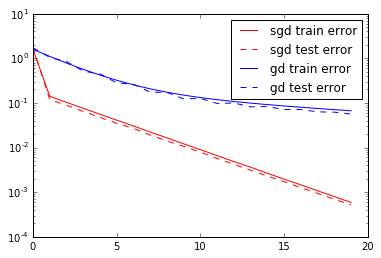

In [37]:
%matplotlib inline
np.random.seed(0)

# Parameters for sgd and gd on gaussian linear regression
d = 20; 
n = 2000; 
n_test = 100; 
X = np.mat(np.random.rand(n,d))
w_opt = np.mat(np.random.rand(d,1))
y = X * w_opt
T = 20;

# Initial models for both sgd and gd are the same
gd_w = np.mat(np.random.rand(d,1))
sgd_w = gd_w

# Test data
X_test = np.mat(np.random.rand(n_test,d))
y_test = X_test * w_opt

def ComputeLoss(X, y, w):
    return (linalg.norm(X*w-y)**2) / X.shape[0]

def GradientAtDatapoint(weights, datapoint_weights, datapoint_label):
    return (2 * (datapoint_weights * weights - datapoint_label)) * datapoint_weights

def ComputeGradient(X, y, w):
    return 2*(X.T*X*w - X.T*y)

sgd_train_losses, sgd_test_losses = SGD(X, y, X_test, y_test, sgd_w, 
                                        GradientAtDatapoint, ComputeLoss, 
                                        n_iters=T, sgd_gamma=.0005)
gd_train_losses, gd_test_losses = GD(X, y, X_test, y_test, gd_w, 
                                     ComputeGradient, ComputeLoss, 
                                     n_iters=T, gd_gamma=.00009)

plt.semilogy(range(T), sgd_train_losses, 'r-', label="sgd train error")
plt.semilogy(range(T), sgd_test_losses, '--r', label="sgd test error")
plt.semilogy(range(T), gd_train_losses, 'b-', label="gd train error")
plt.semilogy(range(T), gd_test_losses, '--b', label="gd test error")
plt.legend(loc="upper right")
plt.show(); 

# Logistic regression
For logistic regression we are trying to minimize
$$\min_{\bf x} \frac{1}{n} \sum_{i=1}^n f_i(x) $$
where 
$$
f_i(x) = -y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))
$$
and
$$
h_{\theta}(x) = \frac{1}{1+e^{-\theta^{T}x}}
$$

In [ ]:
%matplotlib inline
np.random.seed(0)

def GenerateGaussianLogisticRegressionDataset(n, d, n_test):
    X = np.mat(np.random.rand(n,d))
    w_opt = np.mat(np.random.rand(d,1)) - .5
    y =  np.mat([[0] if x.dot(w_opt) <= [0] else 1 for x in X])
    X_test = np.mat(np.random.rand(n_test,d))
    y_test = np.mat([[0] if x.dot(w_opt) <= [0] else 1 for x in X_test])
    return X, y, X_test, y_test

# Parameters for sgd and gd on gaussian logistic regression
d = 20; 
n = 2000; 
n_test = 100; 
X, y, X_test, y_test = GenerateGaussianLogisticRegressionDataset(n, d, n_test)

# Initial models for both sgd and gd are the same
gd_w = np.mat(np.random.rand(d,1))
sgd_w = gd_w

def hyp(theta, x):
    return float(1 / (1 + np.exp(-x.dot(theta))))

def ComputeLoss(X, y, theta):
    loss = 0
    for i, x in enumerate(X):
        loss += -y[i] * np.log(hyp(theta, x)) - (1-y[i]) * np.log((1 - hyp(theta, x)))
    return float(loss / X.shape[0])

def GradientAtDatapoint(weights, datapoint_weights, datapoint_label):
    h = hyp(weights, datapoint_weights)
    sgd_grad = datapoint_weights.T * (h-datapoint_label)
    return sgd_grad.T

def ComputeGradient(X, y, w):
    h = np.matrix([[hyp(w, x)] for x in X])
    gd_grad = (X.T * (h-y))/n
    return gd_grad

sgd_train_losses, sgd_test_losses = SGD(X, y, X_test, y_test, sgd_w, 
                                        GradientAtDatapoint, ComputeLoss, 
                                        n_iters=T, sgd_gamma=.005)
gd_train_losses, gd_test_losses = GD(X, y, X_test, y_test, gd_w, 
                                     ComputeGradient, ComputeLoss, 
                                     n_iters=T, gd_gamma=.9)

plt.semilogy(range(T), sgd_train_losses, 'r-', label="sgd train error")
plt.semilogy(range(T), sgd_test_losses, '--r', label="sgd test error")
plt.semilogy(range(T), gd_train_losses, 'b-', label="gd train error")
plt.semilogy(range(T), gd_test_losses, '--b', label="gd test error")
plt.legend(loc="upper right")
plt.show(); 